In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
order_details = pd.read_csv("order_details.csv")
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
pizza_types = pd.read_csv("pizza_types.csv", encoding= 'unicode_escape')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [5]:
pizza = pd.read_csv("pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:

orders["date"] = orders["date"].astype("datetime64[ns]")
orders["time"] = orders["time"].astype("datetime64[ns]")
orders.info()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9576\3814092689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = orders["time"].astype("datetime64[ns]")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [9]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [11]:
pizza.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [13]:
pizza_types.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [14]:
orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [16]:
order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [ ]:
#total sales

In [20]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [19]:
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [27]:
total_df = pd.merge(left = order_details, right = pizza, on = "pizza_id", how = "inner")
total_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [29]:
total_df ["sales"] = total_df["quantity"] * total_df["price"]
total_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [30]:
print("total sales is", total_df["sales"].sum())

total sales is 817860.0499999999


In [32]:
# identify which pizza is ordered the most
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [33]:
hot_selling = pd.merge(left = pizza_types, right = total_df, on = "pizza_type_id", how ="inner")
hot_selling.head()

,pizza_type_id,name,category,ingredients,order_details_id,order_id,pizza_id,quantity,size,price,sales
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,bbq_ckn_s,1,S,12.75,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,bbq_ckn_s,1,S,12.75,12.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,bbq_ckn_s,1,S,12.75,12.75
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,bbq_ckn_s,1,S,12.75,12.75
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,bbq_ckn_s,1,S,12.75,12.75


In [36]:
gb = hot_selling.groupby("name").agg({"order_id":"count"})
gb

,order_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [38]:
print("most selling pizza is : ",gb["order_id"].idxmax())

most selling pizza is :  The Classic Deluxe Pizza


In [39]:
#Identify which pizza category is hotselling.
order_details.head()
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [40]:
 order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [42]:
hot_selling.head()

,pizza_type_id,name,category,ingredients,order_details_id,order_id,pizza_id,quantity,size,price,sales
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,bbq_ckn_s,1,S,12.75,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,bbq_ckn_s,1,S,12.75,12.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,bbq_ckn_s,1,S,12.75,12.75
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,bbq_ckn_s,1,S,12.75,12.75
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,bbq_ckn_s,1,S,12.75,12.75


In [47]:
gb = hot_selling.groupby("category").agg({"order_details_id":"count"})
print(gb)
most_ordered = gb["order_details_id"].idxmax()
print("the most ordered pizza category is",most_ordered)

          order_details_id
category                  
Chicken              10815
Classic              14579
Supreme              11777
Veggie               11449
the most ordered pizza category is Classic


In [ ]:
#Identify which pizza is generating more sales

In [50]:

gb = hot_selling.groupby("name").agg({"sales":"sum"})
#print(gb)

best_seller = gb ["sales"].idxmax()
print("The pizza which is generating the most revenue is", best_seller)

The pizza which is generating the most revenue is The Thai Chicken Pizza


In [68]:
#identify which day of the week we are getting the most orders.

orders.head()

orders["weekday"] = orders["date"].dt.strftime("%A")
orders.head()

,order_id,date,time,weekday
0,1,2015-01-01,2023-10-28 11:38:36,Thursday
1,2,2015-01-01,2023-10-28 11:57:40,Thursday
2,3,2015-01-01,2023-10-28 12:12:28,Thursday
3,4,2015-01-01,2023-10-28 12:16:31,Thursday
4,5,2015-01-01,2023-10-28 12:21:30,Thursday


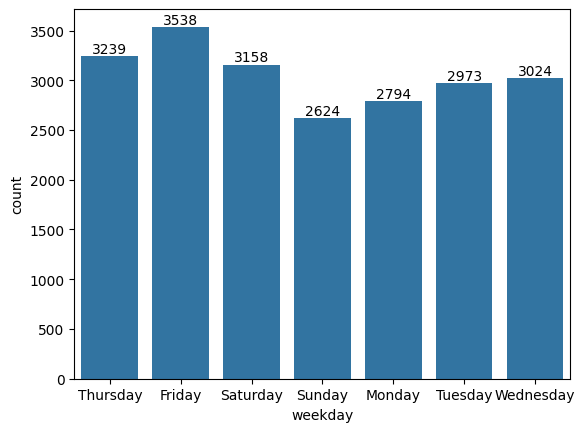

In [72]:
ax = sns.countplot(x = "weekday", data = orders, )

ax.bar_label(ax.containers[0])
plt.show()

In [73]:
orders.head()

,order_id,date,time,weekday
0,1,2015-01-01,2023-10-28 11:38:36,Thursday
1,2,2015-01-01,2023-10-28 11:57:40,Thursday
2,3,2015-01-01,2023-10-28 12:12:28,Thursday
3,4,2015-01-01,2023-10-28 12:16:31,Thursday
4,5,2015-01-01,2023-10-28 12:21:30,Thursday


In [76]:
#1. identify the time at which we are getting high orders and the time at which we are getting the lowest orders

orders["hours"] = orders["time"].dt.strftime("%H")
orders.head()

,order_id,date,time,weekday,hours
0,1,2015-01-01,2023-10-28 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-28 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-28 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-28 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-28 12:21:30,Thursday,12


In [78]:
gb = orders.groupby("hours").agg({"order_id":"count"})
gb

,order_id
hours,
09,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


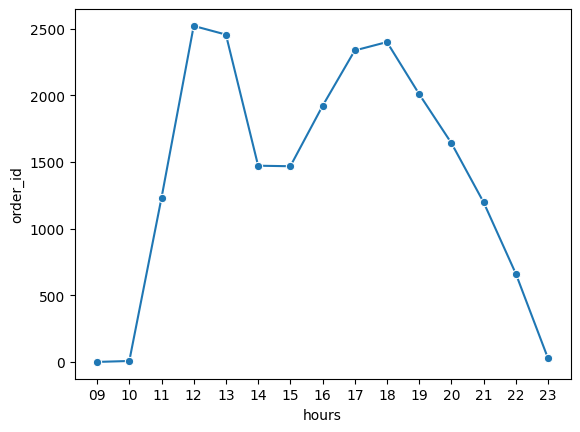

In [81]:
sns.lineplot(x = gb.index, y = gb["order_id"] , data = gb, marker = "o")
plt.show()

In [82]:
#6. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)
orders.head()

,order_id,date,time,weekday,hours
0,1,2015-01-01,2023-10-28 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-28 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-28 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-28 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-28 12:21:30,Thursday,12


In [84]:
orders["hours"] = orders["hours"].astype("int64")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
 3   weekday   21350 non-null  object        
 4   hours     21350 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 834.1+ KB


In [85]:
orders.loc[(orders["hours"] < 12), "period"] = "morning"
orders.loc[((orders["hours"] >= 12) & (orders["hours"] < 17)), "period"] = "afternoon"
orders.loc[((orders["hours"] >= 17) & (orders["hours"] < 21)), "period"] = "evening"
orders.loc[(orders["hours"] >= 21), "period"] = "night"

orders.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9576\2200451370.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  orders.loc[(orders["hours"] < 12), "period"] = "morning"


,order_id,date,time,weekday,hours,period
0,1,2015-01-01,2023-10-28 11:38:36,Thursday,11,morning
1,2,2015-01-01,2023-10-28 11:57:40,Thursday,11,morning
2,3,2015-01-01,2023-10-28 12:12:28,Thursday,12,afternoon
3,4,2015-01-01,2023-10-28 12:16:31,Thursday,12,afternoon
4,5,2015-01-01,2023-10-28 12:21:30,Thursday,12,afternoon


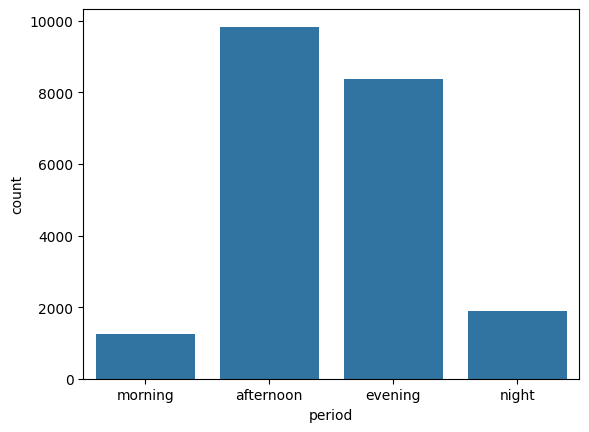

In [94]:
sns.countplot(x = "period", data = orders)
plt.show()

 